# 04 - Feature Selection / Dimensionality Reduction
In this section, we will use several methods, inlcuding a variance threshold method from sklearn, Backwards elimination, forward and Embedded method. At the end, several trials and errors were created to eliminate more unnecessary fields. 

In [1]:
# All import insertions
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from pandas import isnull
from sklearn import preprocessing
import os    # For file paths
import re    # Regular Expressions

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import VarianceThreshold

In [2]:
#Open files
df = pd.read_csv("../data/processed/data_bivariate.csv", low_memory=False,index_col=0)

In [3]:
df.drop(['PlayId'], axis=1, inplace=True)

In [4]:
df.shape

(28511, 34)

In [5]:
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.transpose()

,count,mean,std,min,25%,50%,75%,max,var,skew,kurt
isHomeTeam,28511.0,0.504051,0.499992,0.00,0.000,1.00,1.00,1.00,0.249992,-0.016206,-1.999878
X,28511.0,60.123478,26.207946,5.25,37.515,60.28,82.85,115.10,686.856427,-0.014068,-1.125885
Y,28511.0,26.827715,3.443716,9.35,24.090,26.84,29.55,44.74,11.859183,0.010594,-0.541048
S,28511.0,4.269283,1.043093,0.00,3.610,4.27,4.96,8.47,1.088043,-0.150453,0.406837
A,28511.0,2.646704,0.930003,0.00,2.060,2.64,3.21,14.71,0.864906,0.610211,3.837740
Orientation,28511.0,180.388089,102.543336,0.00,90.000,181.47,270.34,360.00,10515.135699,-0.018548,-1.237173
Dir,28511.0,179.955335,101.068075,0.02,91.540,184.40,272.80,359.92,10214.755720,-0.016030,-1.320505
Season,28511.0,2017.866297,0.787893,2017.00,2017.000,2018.00,2019.00,2019.00,0.620776,0.240622,-1.352983
Quarter,28511.0,2.500368,1.127628,1.00,1.000,3.00,4.00,4.00,1.271545,-0.007815,-1.381769
Down,28511.0,1.510049,0.669862,1.00,1.000,1.00,2.00,4.00,0.448715,1.120095,0.693333


In [6]:
# Splitting the data into X and Y fields, separating the predictor variable 
X = df.drop("isFirstDown",1)   #Feature Matrix
y = df["isFirstDown"]          #Target Variable

## Variance Threshhold
In Variance Threshold, the function looks at the columns variance, and eliminates the columns that don't meet the threshold. From after a lot of threshold testing, a 0.5 was implimented, and from that, 12 columns can be removed for having little impact. None of the columns are deleted yet, so we can see if the other methods have different suggestions. 

In [7]:
thresh = 0.5 # Testing for the threshold of 0.5
selector = VarianceThreshold(threshold=thresh)
vt = selector.fit_transform(X)

In [8]:
idx = np.where(selector.variances_ > thresh)[0]
idx

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 14, 17, 18, 19, 20, 21,
       24, 25, 26, 27], dtype=int64)

In [9]:
# All the columns prior to Variance Threshold
X.columns

Index(['isHomeTeam', 'X', 'Y', 'S', 'A', 'Orientation', 'Dir', 'Season',
       'Quarter', 'Down', 'Distance', 'HomeScoreBeforePlay',
       'VisitorScoreBeforePlay', 'IsPossTeamInLead', 'DefendersInTheBox',
       'isPlayDirectionLeft', 'TimeSnapDiff', 'YardsToTouchdown',
       'PlayerHeightInches', 'Age', 'Week', 'StadiumTypeCode', 'TurfCode',
       'Centers', 'Cornerbacks', 'DefensiveEnds', 'DefensiveTackles',
       'LineBackers', 'NoseTackles', 'OffensiveGuards', 'Safeties',
       'TightEnds', 'DistanceBins'],
      dtype='object')

In [10]:
# All the columns prior to Variance Threshold All the columns after the Threshold
X.loc[:, selector.get_support()].columns

Index(['X', 'Y', 'S', 'A', 'Orientation', 'Dir', 'Season', 'Quarter',
       'Distance', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'DefendersInTheBox', 'YardsToTouchdown', 'PlayerHeightInches', 'Age',
       'Week', 'StadiumTypeCode', 'Cornerbacks', 'DefensiveEnds',
       'DefensiveTackles', 'LineBackers'],
      dtype='object')

In [11]:
# All the columns the Variance Threshold is removing
VarElim = (X.columns.difference(X.loc[:, selector.get_support()].columns)).tolist()
print(VarElim)


['Centers', 'DistanceBins', 'Down', 'IsPossTeamInLead', 'NoseTackles', 'OffensiveGuards', 'Safeties', 'TightEnds', 'TimeSnapDiff', 'TurfCode', 'isHomeTeam', 'isPlayDirectionLeft']


## Backward Elimination
Checking the performance of the model with all the features, and then removes all the weaker performers one by one, until the model hits an acceptable performance. The first set of code is running the model once, using the Ordinary Least Squares method. From this method, 14 attributes have a p-value above 0.05, so they could be removed. 

The second set of code uses an iterative approach and removes one at a time and outputs the attributes to keep. In this case, 11 fields are suggested to keep. 

In [12]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)

#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues.sort_values()

Distance                  1.410482e-195
A                          4.349865e-87
S                          1.112289e-26
DistanceBins               3.828527e-14
Down                       6.033169e-12
YardsToTouchdown           6.749892e-09
DefendersInTheBox          1.015276e-05
const                      6.801332e-04
Season                     9.756034e-04
Age                        1.048835e-03
OffensiveGuards            2.521691e-03
StadiumTypeCode            6.354522e-02
TightEnds                  1.105521e-01
HomeScoreBeforePlay        1.935773e-01
IsPossTeamInLead           2.567422e-01
isHomeTeam                 3.050106e-01
TimeSnapDiff               3.258245e-01
NoseTackles                4.456819e-01
Y                          4.488328e-01
Centers                    4.538365e-01
PlayerHeightInches         5.397174e-01
isPlayDirectionLeft        5.612602e-01
DefensiveTackles           5.966424e-01
Week                       5.976948e-01
Safeties                   6.648634e-01


In [13]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['S', 'A', 'Season', 'Down', 'Distance', 'DefendersInTheBox', 'YardsToTouchdown', 'Age', 'OffensiveGuards', 'TightEnds', 'DistanceBins']


## RFE (Recursive Feature Elimination)
This method is similar to the backwards elimination feature but compares it to the accuracy. The first set of code uses a linear regression and RFE model to find 7 columns that could be found. 

The second set of code loops over all the attributes and determines how many columns would bring the highest accuracy. In this case, 25 features looks to bring the best result.

The final set in this block runs the same RFE model, but with the 25 attributes that it recommends to keep.

In [14]:
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 7)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
model.fit(X_rfe,y)
# Which columns can be kept
print(X.columns[rfe.support_])
print(rfe.support_)
print(rfe.ranking_)

Index(['S', 'A', 'Down', 'Distance', 'DefendersInTheBox', 'NoseTackles',
       'DistanceBins'],
      dtype='object')
[False False False  True  True False False False False  True  True False
 False False  True False False False False False False False False False
 False False False False  True False False False  True]
[14 25 21  1  1 27 26  6 15  1  1 22 24 13  1  8 10 20 18 16 23 11 17 12
 19  5  2  4  1  7  3  9  1]


In [15]:
#no of features
nof_list=np.arange(1,34)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 25
Score with 25 features: 0.208257


In [16]:
cols = list(X.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 25)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['isHomeTeam', 'S', 'A', 'Season', 'Quarter', 'Down', 'Distance',
       'IsPossTeamInLead', 'DefendersInTheBox', 'isPlayDirectionLeft',
       'TimeSnapDiff', 'PlayerHeightInches', 'Age', 'StadiumTypeCode',
       'TurfCode', 'Centers', 'Cornerbacks', 'DefensiveEnds',
       'DefensiveTackles', 'LineBackers', 'NoseTackles', 'OffensiveGuards',
       'Safeties', 'TightEnds', 'DistanceBins'],
      dtype='object')


## Embedded Method
Using the lasso regularization, this method selects the attributes that contribute the most to the data set, and marks the ones with no impact with a 0 coefficient. In this instance, 25 fields can be used for data selection, and 8 features can be removed as irrelevant to the data. 

In [17]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000888
Best score using built-in LassoCV: 0.209316


In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 25 variables and eliminated the other 8 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

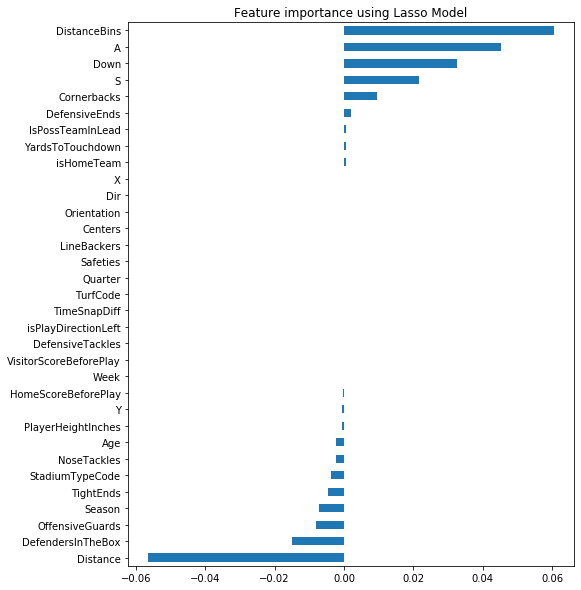

In [19]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [20]:
#imp_coef.where((imp_coef == 0)).notna()
sfEmbed = (imp_coef[imp_coef == 0].keys()).tolist()
print(sfEmbed)

['DefensiveTackles', 'isPlayDirectionLeft', 'TimeSnapDiff', 'TurfCode', 'Quarter', 'Safeties', 'LineBackers', 'Centers']


## Principal Component Analysis
A preliminary look at Principal Component Analysis to see if it would be helpful to create a prediction variable set. From the looks of it, if we add all 34 features to it, we can use 17 components and receive a 70% variance. This code can be duplicated in future methods, and the plan is to have two data sets going forward. One will be all the features intact, and another with features removed based on the above methods of feature selection, and compare the results based on accuracy, precision and recall. 

In [21]:
X = df.drop("isFirstDown",1)   #Feature Matrix
y = df["isFirstDown"]          #Target Variable

In [22]:
# Splitting data set into train and test
from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=72)


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [25]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print (np.count_nonzero(explained_variance))

[8.14771554e-02 7.18216981e-02 6.64221574e-02 6.46141960e-02
 5.50175355e-02 5.18584630e-02 4.63088087e-02 4.24549036e-02
 3.72215710e-02 3.42882224e-02 3.35881258e-02 3.23178596e-02
 3.16274278e-02 3.07348394e-02 2.91652001e-02 2.81397069e-02
 2.76104925e-02 2.72178570e-02 2.61465453e-02 2.52845929e-02
 2.12033586e-02 1.95756052e-02 1.87710805e-02 1.74919611e-02
 1.73740463e-02 1.63045036e-02 1.52322111e-02 1.09984267e-02
 7.42777405e-03 7.02178917e-03 3.67802557e-03 1.52078241e-03
 8.30773017e-05]
33


In [26]:
for i in range(0,np.count_nonzero(explained_variance + 1)):
    print(i," ", sum(explained_variance[0:i]))

0   0
1   0.08147715541116358
2   0.1532988535321883
3   0.21972101091326654
4   0.28433520696181336
5   0.33935274243653496
6   0.39121120543453014
7   0.4375200141775057
8   0.4799749177535398
9   0.5171964887467039
10   0.5514847111726957
11   0.5850728369444471
12   0.6173906965419876
13   0.6490181243839467
14   0.6797529637846832
15   0.7089181639116735
16   0.73705787080208
17   0.7646683632810959
18   0.7918862202654221
19   0.818032765519148
20   0.8433173584619594
21   0.8645207170520294
22   0.8840963222118845
23   0.9028674027063758
24   0.9203593637974935
25   0.9377334100921325
26   0.954037913664902
27   0.9692701247617302
28   0.9802685514974687
29   0.9876963255516878
30   0.9947181147227429
31   0.9983961402898036
32   0.9999169226983325


## Saving a dataset with all features intact
This data will be used with PCA modelling

In [27]:
df.shape

(28511, 34)

In [28]:
df.to_csv("../data/processed/data_allcolumns.csv")

## Final attribute drops

In [29]:
# Removing all columns suggested, bringing the number of attributes to 12
# df.drop(['A', 'Age', 'Centers', 'Cornerbacks', 'DefendersInTheBox', 'Distance', 'DistanceBins', 'Down', \
#          'isHomeTeam', 'isPlayDirectionLeft', 'IsPossTeamInLead', 'LineBackers', 'NoseTackles', \
#          'OffensiveGuards', 'Quarter', 'S', 'Safeties', 'Season', 'StadiumTypeCode', 'TightEnds', 'TimeSnapDiff', \
#          'TurfCode', 'YardsToTouchdown'], axis=1, inplace=True)

In [31]:
toAdd = set(selected_features_rfe)
toAdd.add('isFirstDown')
# Removing based only on low variance
# df.drop(VarElim, axis=1, inplace=True)

# Removing based only on backwards elimination
# df.drop(selected_features_BE, axis=1, inplace=True)

# Removing based only on recursive feature extraction

df = df[toAdd]

# Removing based only on Embed Method
# df.drop(sfEmbed, axis=1, inplace=True)

# Removing based on low variance and Embedded method
# toRemove = VarElim + list(set(sfEmbed) - set(VarElim))
# df.drop(toRemove, axis=1, inplace=True)


In [32]:
df.shape

(28511, 26)

In [33]:
df.to_csv("../data/processed/data_ready.csv")